## UTILITIES

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install metrics

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score,RocCurveDisplay


In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
def plot_multiclass_roc(clf, X, y, clf_name='', ax=None):
    if not isinstance(y, type(np.array([]))):
        y = y.values
    if ax is None:
        fig = plt.figure(figsize = (6, 4))
        ax = fig.add_subplot()
    y_pred_proba = clf.predict_proba(X)
    for i, label in enumerate(np.unique(y)):
        class_i_arr = (y == label).astype(int)
        class_i_prob_arr = y_pred_proba[:, i]
        RocCurveDisplay.from_predictions(class_i_arr, class_i_prob_arr,
                        name = clf_name + f'class {label}', ax = ax)
    random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--',
                 label = 'Random Classifier')
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    ax.set_xlabel('False Positive Rate', fontsize = 14)
    return ax

In [ ]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})

my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_confusion_mtx(cm: 'confusion matrix', labels = None,
                       figsize = (3,3), binary = True):
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot()
    sns.heatmap(cm, annot = True, fmt = '0', annot_kws = {"fontsize": 16},
                cmap = "Blues", cbar = False, ax = ax)
    ax.set_xlabel('Predicted Class', fontsize = 14)
    ax.set_ylabel('Actual Class', fontsize = 14)
    if labels is None:
        labels = range(1, cm.shape[1] + 1)
    ax.set_xticks(ax.get_xticks(), labels)
    ax.set_yticks(ax.get_yticks(), labels)
    if binary:
        ax.set_xticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.set_yticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')

In [ ]:
# we use the dataset without duplicated columns

X_train = pd.read_csv('X_train_nocorrelconnomi.csv', header = 0)
y_train = pd.read_fwf('y_train.txt', header = None)
X_test = pd.read_csv('X_test_nocorrelconnomi.csv', header = 0)
y_test = pd.read_fwf('y_test.txt', header = None)

In [ ]:
# show all columns

pd.set_option("display.max_columns", None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
X_train

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-sma(),tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Z,tBodyGyroJerk-energy()-X,"tBodyGyroJerk-arCoeff()-X,1","tBodyGyroJerk-arCoeff()-X,2","tBodyGyroJerk-arCoeff()-X,3","tBodyGyroJerk-arCoeff()-X,4","tBodyGyroJerk-arCoeff()-Y,1","tBodyGyroJerk-arCoeff()-Y,2","tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Y,4","tBodyGyroJerk-arCoeff()-Z,1","tBodyGyroJerk-arCoeff()-Z,2","tBodyGyroJerk-arCoeff()-Z,3","tBodyGyroJerk-arCoeff()-Z,4","tBodyGyroJerk-correlation()-X,Y","tBodyGyroJerk-correlation()-X,Z","tBodyGyroJerk-correlation()-Y,Z",tBodyAccMag-min(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,tBodyAccJerkMag-min(),tBodyAccJerkMag-arCoeff()1,tBodyAccJerkMag-arCoeff()2,tBodyAccJerkMag-arCoeff()3,tBodyAccJerkMag-arCoeff()4,tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-entropy(),tBodyGyroMag-arCoeff()1,tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroJerkMag-min(),tBodyGyroJerkMag-arCoeff()1,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAcc-max()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-kurtosis()-X,fBodyAcc-kurtosis()-Y,fBodyAcc-kurtosis()-Z,"fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-57,64.2","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-1,24",fBodyAccJerk-max()-X,fBodyAccJerk-max()-Y,fBodyAccJerk-max()-Z,fBodyAccJerk-min()-X,fBodyAccJerk-min()-Y,fBodyAccJerk-min()-Z,fBodyAccJerk-iqr()-Z,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInds-Y,fBodyAccJerk-m

In [ ]:
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-sma(),tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Z,tBodyGyroJerk-energy()-X,"tBodyGyroJerk-arCoeff()-X,1","tBodyGyroJerk-arCoeff()-X,2","tBodyGyroJerk-arCoeff()-X,3","tBodyGyroJerk-arCoeff()-X,4","tBodyGyroJerk-arCoeff()-Y,1","tBodyGyroJerk-arCoeff()-Y,2","tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Y,4","tBodyGyroJerk-arCoeff()-Z,1","tBodyGyroJerk-arCoeff()-Z,2","tBodyGyroJerk-arCoeff()-Z,3","tBodyGyroJerk-arCoeff()-Z,4","tBodyGyroJerk-correlation()-X,Y","tBodyGyroJerk-correlation()-X,Z","tBodyGyroJerk-correlation()-Y,Z",tBodyAccMag-min(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,tBodyAccJerkMag-min(),tBodyAccJerkMag-arCoeff()1,tBodyAccJerkMag-arCoeff()2,tBodyAccJerkMag-arCoeff()3,tBodyAccJerkMag-arCoeff()4,tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-entropy(),tBodyGyroMag-arCoeff()1,tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroJerkMag-min(),tBodyGyroJerkMag-arCoeff()1,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAcc-max()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-kurtosis()-X,fBodyAcc-kurtosis()-Y,fBodyAcc-kurtosis()-Z,"fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-57,64.2","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-1,24",fBodyAccJerk-max()-X,fBodyAccJerk-max()-Y,fBodyAccJerk-max()-Z,fBodyAccJerk-min()-X,fBodyAccJerk-min()-Y,fBodyAccJerk-min()-Z,fBodyAccJerk-iqr()-Z,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInd

In [ ]:
X_test=X_test.drop("tBodyAcc-mean()-X",axis=1)

In [ ]:
X_test

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-sma(),tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Z,tBodyGyroJerk-energy()-X,"tBodyGyroJerk-arCoeff()-X,1","tBodyGyroJerk-arCoeff()-X,2","tBodyGyroJerk-arCoeff()-X,3","tBodyGyroJerk-arCoeff()-X,4","tBodyGyroJerk-arCoeff()-Y,1","tBodyGyroJerk-arCoeff()-Y,2","tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Y,4","tBodyGyroJerk-arCoeff()-Z,1","tBodyGyroJerk-arCoeff()-Z,2","tBodyGyroJerk-arCoeff()-Z,3","tBodyGyroJerk-arCoeff()-Z,4","tBodyGyroJerk-correlation()-X,Y","tBodyGyroJerk-correlation()-X,Z","tBodyGyroJerk-correlation()-Y,Z",tBodyAccMag-min(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,tBodyAccJerkMag-min(),tBodyAccJerkMag-arCoeff()1,tBodyAccJerkMag-arCoeff()2,tBodyAccJerkMag-arCoeff()3,tBodyAccJerkMag-arCoeff()4,tBodyGyroMag-min(),tBodyGyroMag-energy(),tBodyGyroMag-entropy(),tBodyGyroMag-arCoeff()1,tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroJerkMag-min(),tBodyGyroJerkMag-arCoeff()1,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAcc-max()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-kurtosis()-X,fBodyAcc-kurtosis()-Y,fBodyAcc-kurtosis()-Z,"fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-57,64.2","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-1,24",fBodyAccJerk-max()-X,fBodyAccJerk-max()-Y,fBodyAccJerk-max()-Z,fBodyAccJerk-min()-X,fBodyAccJerk-min()-Y,fBodyAccJerk-min()-Z,fBodyAccJerk-iqr()-Z,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInds-Y,fBodyAccJerk-m

In [ ]:
with open("features.txt") as f:
    lines = f.read().splitlines()

In [ ]:
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [ ]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
clf=RandomForestClassifier(n_estimators=500,
                           criterion="gini",
                           max_depth=None,
                           min_samples_leaf=1,
                           min_samples_split= 2 ,
                           max_features="auto",
                           random_state=0,
                           n_jobs=-1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy %s",  accuracy_score(y_test, y_pred))
print("F1-score %s",  f1_score(y_test, y_pred,average=None))
print(classification_report(y_test, y_pred, target_names=activities.values()))

<ipython-input-22-a725f0d34b07>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy %s 0.9491007804546997
F1-score %s [0.97425743 0.93762994 0.92901619 0.91710388 0.92942255 0.99906977]
                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.97       496
  WALKING_UPSTAIRS       0.92      0.96      0.94       471
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
           SITTING       0.95      0.89      0.92       491
          STANDING       0.91      0.95      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,

}

In [ ]:
reg = clf=RandomForestClassifier(**params)
reg.fit(X_train, y_train)

#mse = mean_squared_error(y_test, reg.predict(X_test))
#print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

<ipython-input-75-0c8131aa3a81>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=500)

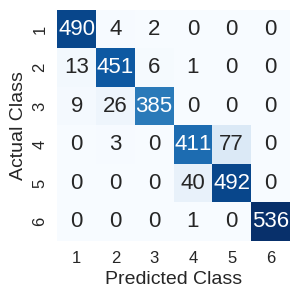

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
plot_confusion_mtx(cm, binary = False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

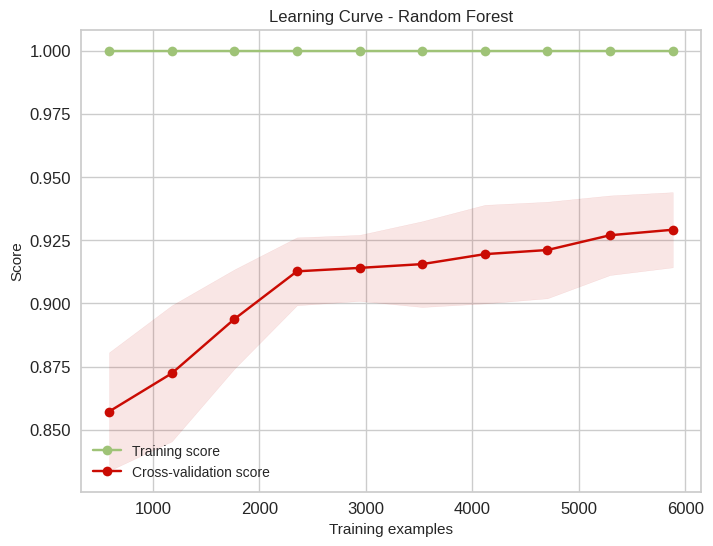

In [ ]:

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

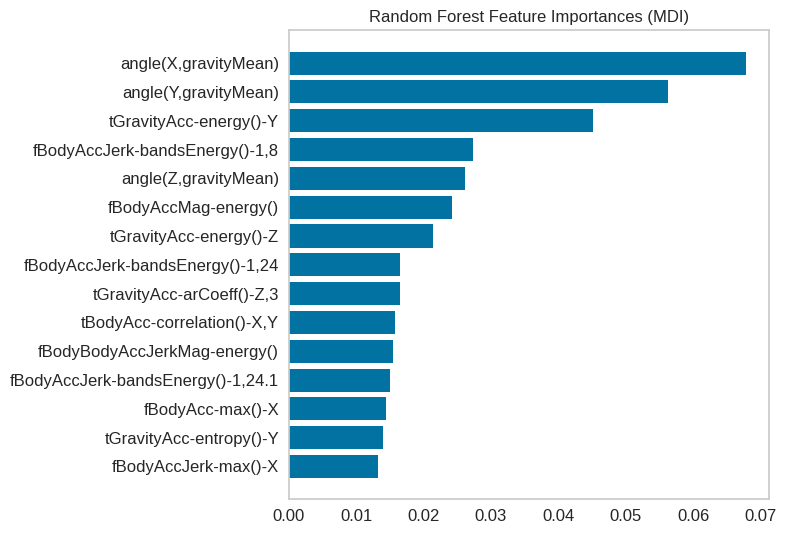

In [ ]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(list(X_test.columns))[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.tight_layout()
#plt.savefig('RF_importance.pdf', bbox_inches = 'tight')

plt.show()

In [ ]:
from sklearn.inspection import permutation_importance


In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)


In [ ]:
col_names=list(X_test.columns)


In [ ]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(col_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.savefig('random_importance.pdf', bbox_inches = 'tight')
plt.show()

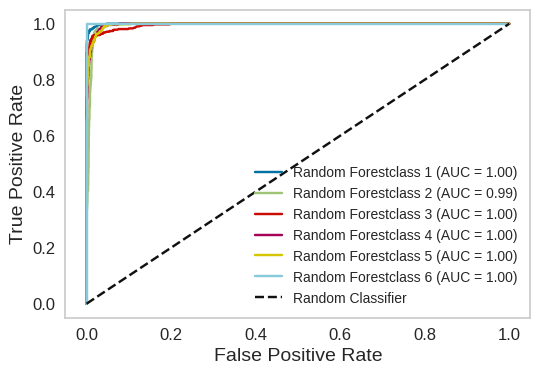

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf, X_test, y_test,
                    'Random Forest', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('RF_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

##BAGGING

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#%%time
#from sklearn.naive_bayes import GaussianNB
# Set the parameters by cross-validation
#param_grid = {
#    'max_features' : [1, 2, 3, 4],
#    'max_samples' : [0.05, 0.02, 0.01, 0.1, 0.2, 0.5, 1.0],
#    'n_estimators': [1, 5, 10, 25, 50, 100]
#}

#scores = ['precision', 'recall', 'f1']
#scores = ['accuracy']
#
#for score in scores:
#    print("# Tuning hyper-parameters for ----> %s" % score)
#    print()#

#    clf4 = RandomizedSearchCV(BaggingClassifier(GradientBoostingClassifier()), param_grid, scoring = score)
#    clf4.fit(X_train, y_train)
#    print("Best parameters set found on development set:")
#    print()
#    print(clf4.best_params_)
#    print()
#    print("Grid scores on development set:")
#    print()
#    means = clf4.cv_results_['mean_test_score']
#    stds = clf4.cv_results_['std_test_score']
#    for mean, std, params in zip(means, stds, clf4.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#    print()
#
#    print("Detailed classification report:")
#    print()
#    print("The model is trained on the full development set.")
#    print("The scores are computed on the full evaluation set.")
#    print()
#    y_true, y_pred = y_test, clf4.predict(X_test)
#    print(classification_report(y_true, y_pred))
#    print()

In [ ]:
clf7 = BaggingClassifier()
clf7.fit(X_train, y_train)
y_pred = clf7.predict(X_test)
print(classification_report(y_test, y_pred))
print()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.85      0.95      0.90       496
           2       0.85      0.78      0.82       471
           3       0.91      0.85      0.88       420
           4       0.85      0.82      0.83       491
           5       0.84      0.87      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947




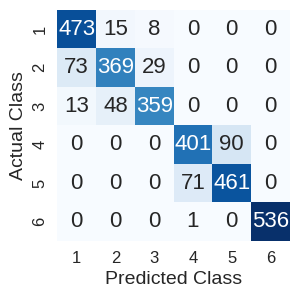

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf7.classes_)
plot_confusion_mtx(cm, binary = False)

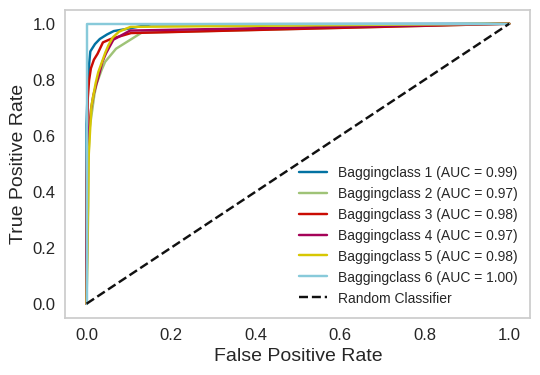

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf7, X_test, y_test,
                    'Bagging', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('RF_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

#BAGGING + GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf5 = BaggingClassifier(GradientBoostingClassifier())
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
print(classification_report(y_test, y_pred))
print()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.93      0.96      0.94       471
           3       0.98      0.92      0.95       420
           4       0.91      0.84      0.87       491
           5       0.86      0.92      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947




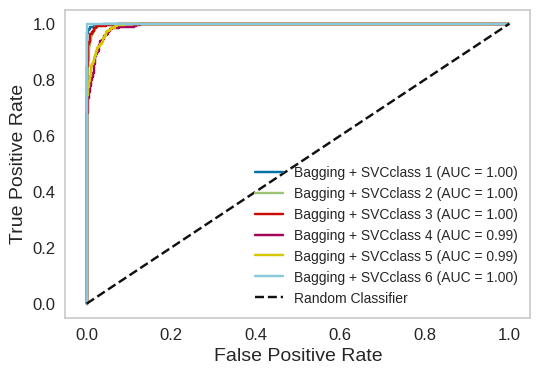

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf5, X_test, y_test,
                    'Bagging + SVC', ax = ax)
ax.legend(fontsize = 'small')
#plt.savefig('RF_multiclass_roc.pdf', bbox_inches = 'tight')
plt.show()

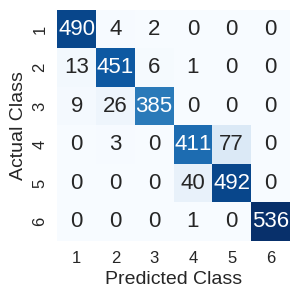

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf5.classes_)
plot_confusion_mtx(cm, binary = False)

LEARNING CURVE

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf5, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + SVC')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

# BAGGING + LINEAR SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf6 = BaggingClassifier(LinearSVC())
clf6.fit(X_train, y_train)
y_pred = clf6.predict(X_test)
print(classification_report(y_test, y_pred))
print()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.94      0.97       420
           4       0.94      0.88      0.91       491
           5       0.87      0.95      0.91       532
           6       1.00      0.96      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


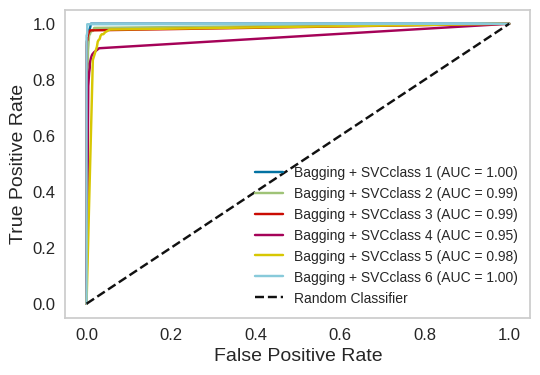

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf6, X_test, y_test,
                    'Bagging + SVC', ax = ax)
ax.legend(fontsize = 'small')
plt.show()

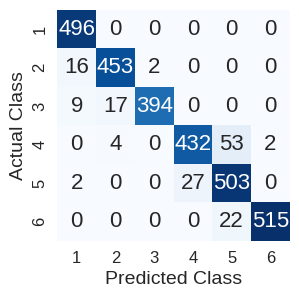

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf6.classes_)
plot_confusion_mtx(cm, binary = False)

LEARNING CURVE

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf6, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + SVC')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

#BOOSTING

In [ ]:
%%time
#from sklearn.tree import DecisionTreeClassifier
## Set the parameters by cross-validation
#tuned_parameters = {
#    'n_estimators': [5, 10, 25, 50, 100],
#    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1],
#    'n_estimators': [1,10,15,50,100]
# }

#scores = ['precision', 'recall', 'f1']
#scores = ['accuracy']

#for score in scores:
#    print("# Tuning hyper-parameters for ----> %s" % score)
#    print()
#
#    obj = AdaBoostClassifier()
#
#    clf8 = RandomizedSearchCV(obj, tuned_parameters, cv=5, scoring=score)
#
#    clf8.fit(X_train, y_train)
#
#    print("Best parameters set found on development set:")
#    print()
#    print(clf8.best_params_)
#    print()
#    print("Grid scores on development set:")
#    print()
#    means = clf8.cv_results_['mean_test_score']
#    stds = clf8.cv_results_['std_test_score']
#    for mean, std, params in zip(means, stds, clf8.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#    print()

#    print("Detailed classification report:")
#    print()
#    print("The model is trained on the full development set.")
#    print("The scores are computed on the full evaluation set.")
#    print()
#    y_true, y_pred = y_test, clf8.predict(X_test)
#    print(classification_report(y_test, y_pred, target_names=activities.values()))
#    print()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf8 = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 5)
clf8.fit(X_train, y_train)
y_pred = clf8.predict(X_test)
print(classification_report(y_test, y_pred, target_names=activities.values()))
y_score = clf8.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score   support

           WALKING       0.62      0.89      0.73       496
  WALKING_UPSTAIRS       0.76      0.66      0.70       471
WALKING_DOWNSTAIRS       0.94      0.60      0.73       420
           SITTING       0.48      1.00      0.65       491
          STANDING       0.00      0.00      0.00       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.69      2947
         macro avg       0.63      0.69      0.64      2947
      weighted avg       0.62      0.69      0.63      2947



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


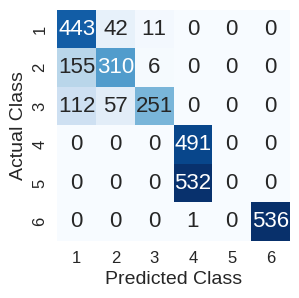

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf8.classes_)
plot_confusion_mtx(cm, binary = False)

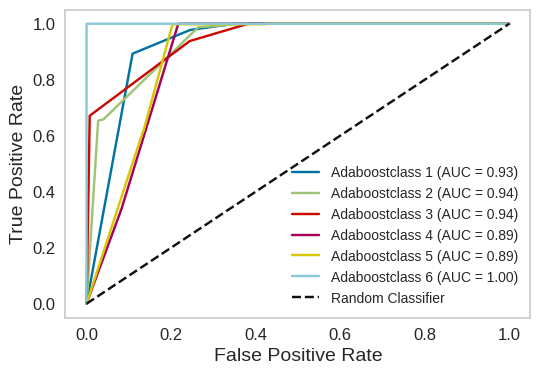

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf8, X_test, y_test,
                    'Adaboost', ax = ax)
ax.legend(fontsize = 'small')
plt.show()

LEARNING CURVE

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf8, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Adaboost classifier')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

## BAGGING + LINEARSVC

In [ ]:
clf9= AdaBoostClassifier(SVC(probability= True),learning_rate= 0.5, n_estimators= 5)
clf9.fit(X_train, y_train)
y_pred = clf9.predict(X_test)
print(classification_report(y_test, y_pred, target_names=activities.values()))
y_score = clf9.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score   support

           WALKING       0.93      0.98      0.95       496
  WALKING_UPSTAIRS       0.90      0.92      0.91       471
WALKING_DOWNSTAIRS       0.94      0.90      0.92       420
           SITTING       0.78      0.89      0.83       491
          STANDING       0.91      0.80      0.85       532
            LAYING       1.00      0.96      0.98       537

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



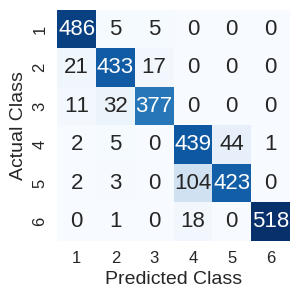

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf9.classes_)
plot_confusion_mtx(cm, binary = False)

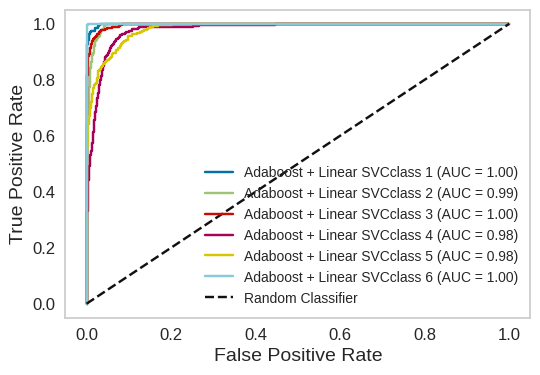

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf9, X_test, y_test,
                    'Adaboost + Linear SVC', ax = ax)
ax.legend(fontsize = 'small')
plt.show()

LEARNING CURVE

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf9, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Adaboost + Linear SVC')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##BAGGING + GRADIENT BOOSTING MACHINES

In [ ]:
clf10= AdaBoostClassifier(GradientBoostingClassifier(),learning_rate= 0.5, n_estimators= 5)
clf10.fit(X_train, y_train)
y_pred = clf10.predict(X_test)
print(classification_report(y_test, y_pred, target_names=activities.values()))
y_score = clf10.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score   support

           WALKING       0.95      0.99      0.97       496
  WALKING_UPSTAIRS       0.94      0.95      0.94       471
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
           SITTING       0.93      0.86      0.89       491
          STANDING       0.88      0.94      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



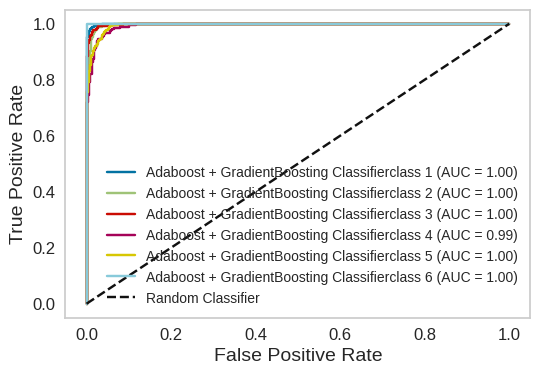

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 4))
plot_multiclass_roc(clf10, X_test, y_test,
                    'Adaboost + GradientBoosting Classifier', ax = ax)
ax.legend(fontsize = 'small')
plt.show()

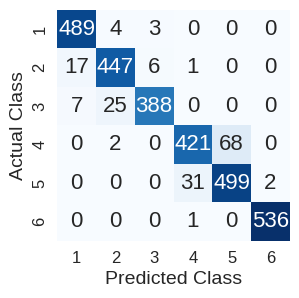

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf10.classes_)
plot_confusion_mtx(cm, binary = False)

LEARNING CURVE

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf10, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Adaboost + Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()